## First register your application with Microsoft entra

1. Open https://entra.microsoft.com/#home

2. Press "App registrations"
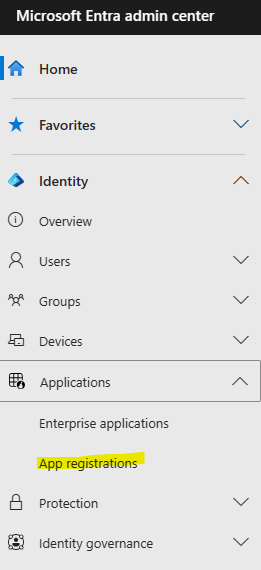

3. Press "New registration"
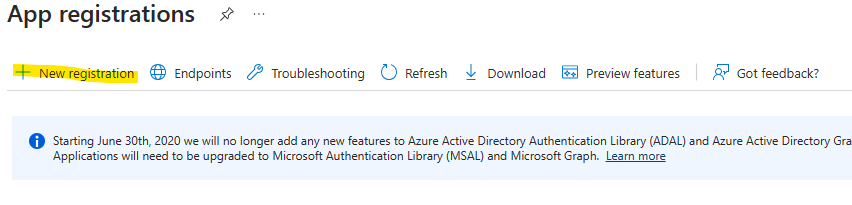

4. Fill out name then press Register button
e.g. I registered "Test app"
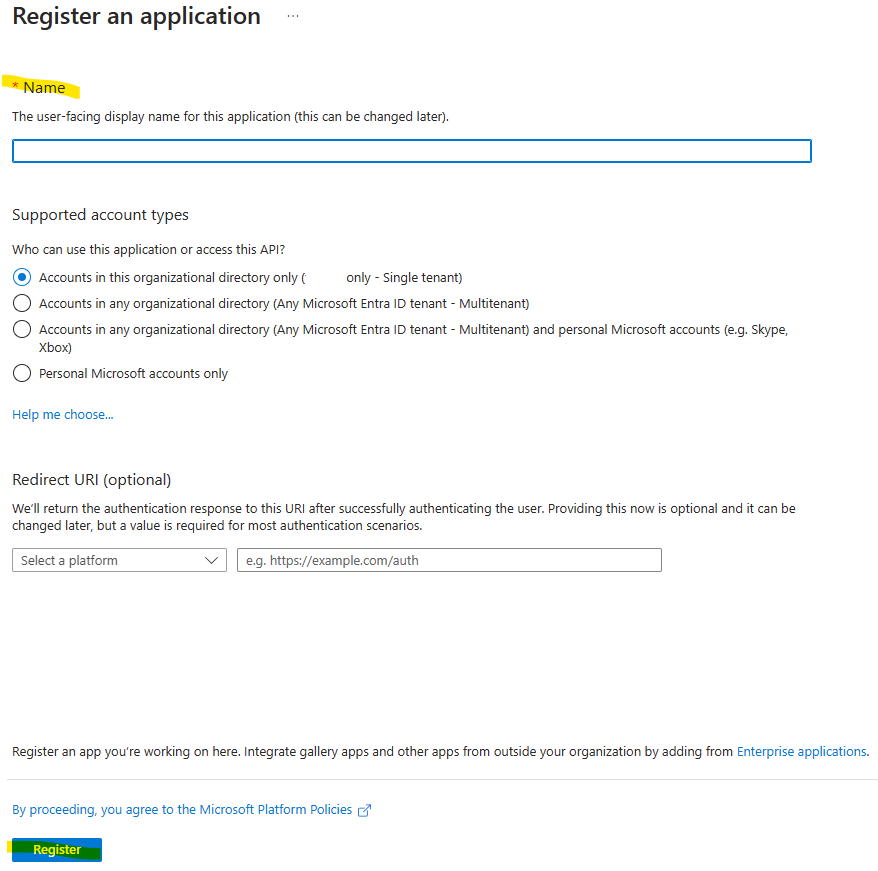

5. Press "API permissions"
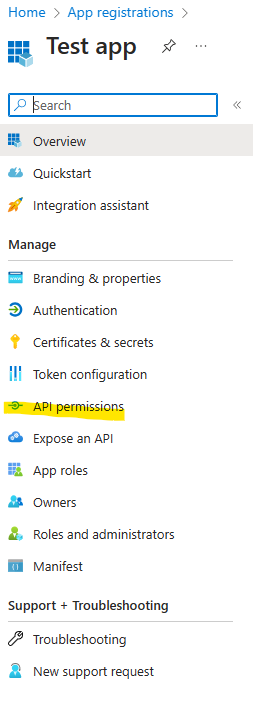

6. Press "Add a permission" in order to add "Files.ReadWrite.All" and "Sites.ReadWrite.All" then click "Grant admin consent"
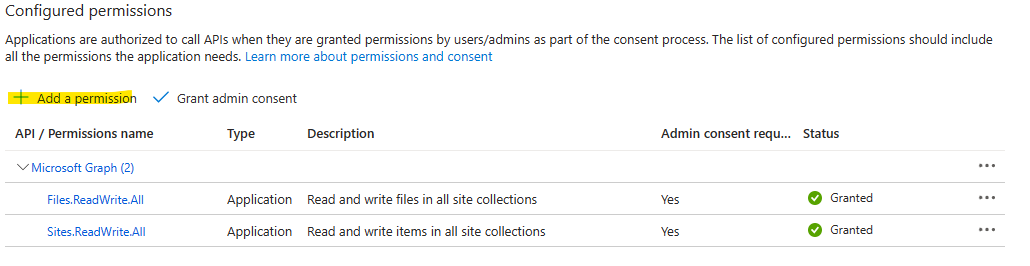

7. Press "Certificates & secrets" then click "new client secret"
Note: Copy and paste value of the client secret to client_secret_value value of this python script.
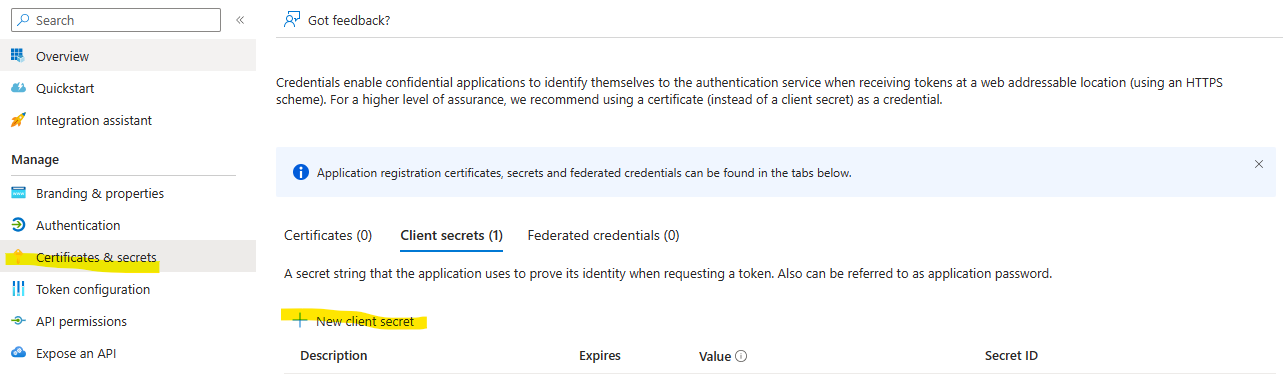

8. Click "Overview"
Note: Copy and paste Application (client) ID and Directory (tenant) ID this python script.
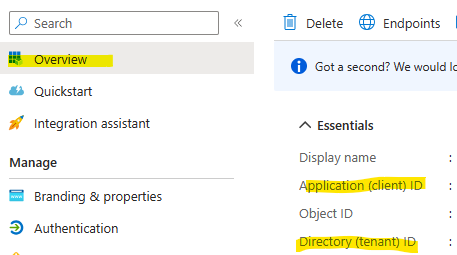

Your oauth2 authentication should succeed with the above settings.
Execute the following code and confirm that the access token can be obtained.

In [5]:
import os
import requests

# Azure AD app registration credentials
client_id = 'your client ID'
client_secret_value = 'your client secret value'
tenant_id = 'your tenant ID'

# Authenticate and get an access token
auth_url = f'https://login.microsoftonline.com/{tenant_id}/oauth2/v2.0/token'
data = {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret_value,
    'scope': 'https://graph.microsoft.com/.default'
}
response = requests.post(auth_url, data=data)
access_token = response.json()['access_token']
print(access_token)

KeyError: 'access_token'

## Then get the site name and library name of the Sharepoint site

1. Open your sharepoint site then copy and paste your site name and library name to this python script.
In this case, 'Development' is site name and 'Documents' is library name.
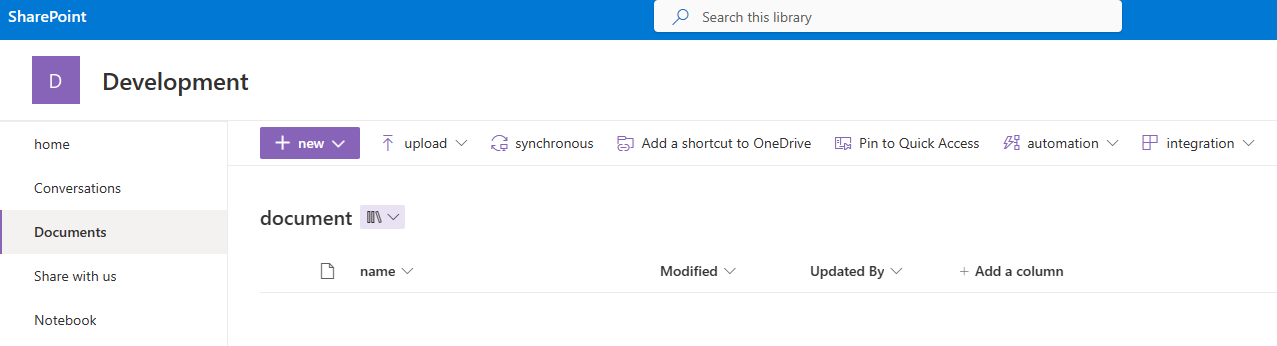

In [ ]:
import os
import requests

# Azure AD app registration credentials
client_id = 'your client ID'
client_secret_value = 'your client secret value'
tenant_id = 'your tenant ID'

# SharePoint Online site URL and library name
site_name = 'Development'
library_name = 'Documents'

# Authenticate and get an access token
auth_url = f'https://login.microsoftonline.com/{tenant_id}/oauth2/v2.0/token'
data = {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret_value,
    'scope': 'https://graph.microsoft.com/.default'
}
response = requests.post(auth_url, data=data)
access_token = response.json()['access_token']

headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/octet-stream'
}

site_url = f'https://graph.microsoft.com/v1.0/sites/root:/sites/{site_name}'
response = requests.get(site_url, headers=headers)
site_id = response.json()['id'].split(',')[1]

drivces_url = f'https://graph.microsoft.com/v1.0/sites/{site_id}/drives'
response = requests.get(drivces_url, headers=headers)
drive = [drive for drive in response.json()['value'] if drive['name'] == library_name][0]
drive_id = drive['id']

# Upload a file to the SharePoint document library using the Microsoft Graph API
file_name = 'test.txt'
folder_name = 'folder'
text = 'hello'
upload_url = f'https://graph.microsoft.com/v1.0/sites/{site_id}/drives/{drive_id}/items/root:/{folder_name}/{file_name}:/content'
headers = {
    'Authorization': f'Bearer {access_token}',
    'Content-Type': 'application/octet-stream',
    'Content-Length': str(len(text.encode('utf-8')))
}


response = requests.put(upload_url, headers=headers, data=text)
print(response.json())

## Finally

Run the above script and you will see a "test.txt" file in the Documents section of your sharepoint site.
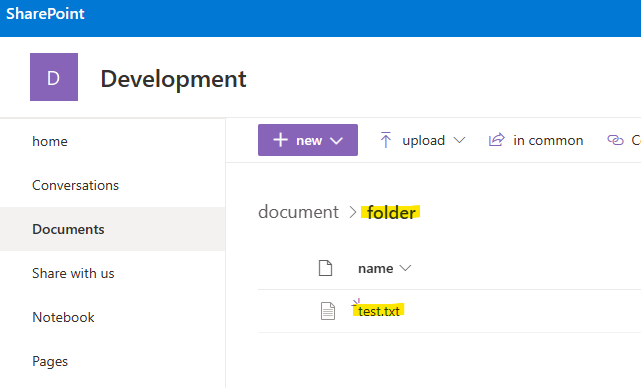